In [1]:
print("Final word to vector")

Final word to vector


In [2]:
# -*- coding: utf-8 -*-
from gensim.models import Word2Vec
import os
import pandas as pd
import gensim
from pyvi import ViTokenizer

In [4]:
path = './data/'
def readdata(path):
    list_file = os.listdir(path)
    data = pd.DataFrame()
    for filename in list_file:
        data = pd.concat([data, pd.read_csv(os.path.join(path, filename), sep = ',')])
        
    return data.Review, data.Label
reviews, labels = readdata(path)
print(len(reviews))

12772


/Users/linhnvc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
input_gensim = []
for review in reviews:
    review = gensim.utils.simple_preprocess(review)
    review = ' '.join(review)
    review = ViTokenizer.tokenize(review)
    input_gensim.append(review.split())

In [1]:
# print(input_gensim)

In [6]:
model = Word2Vec(input_gensim, size=128, window=5, min_count=0, workers=4, sg=1)
model.wv.save("word.model")

/Users/linhnvc/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/Users/linhnvc/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[['oke', 'kỹ_lưỡng', 'phải_chăng', 'hợp_lý', 'đảm_bảo', 'xuất_sắc', 'tuyệt_vời', 'tuyệt', 'hợp_lí', 'giá_cả', 'mướt', 'keng', 'giá_thành', 'tương_đối', 'sài_ok', 'cạnh_tranh', 'kĩ_càng', 'kiểu_dáng', 'tất', 'cứng_cáp'], ['lẫn', 'yếu', 'dở', 'hút', 'kể_cả', 'bắt', 'sống', 'thành_phố', 'tệ', 'tệ_hại', 'cột', 'mạng_di_động', 'tồi', 'chập_chờn', 'wf', 'khoẻ', 'căng', 'khỏe', 'khả_năng', 'tín_hiệu']]
(2, 20, 128)


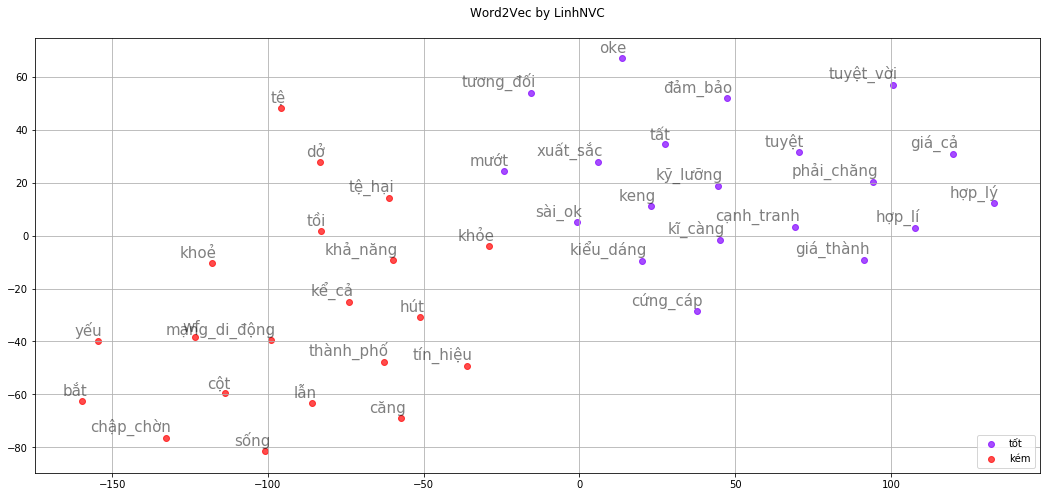

In [15]:
# Load w2v and do some tests 
import gensim.models.keyedvectors as word2vec
w2v_model = word2vec.KeyedVectors.load('./word.model')

keys = ['tốt', 'kém']

embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.most_similar(word, topn=20):
        words.append(similar_word)
        embeddings.append(w2v_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

# for word in keys:
#     embeddings = []
#     words = []
#     embeddings.append(w2v_model[word])
#     words.append(word)
    
#     embedding_clusters.append(embeddings)
#     word_clusters.append(words)
    
print(word_clusters)
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
print(embedding_clusters.shape)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
# % matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(18, 8))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color,]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=15)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Word2Vec by LinhNVC\n', keys, embeddings_en_2d, word_clusters, 0.7,
                        'output.png')
